In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [3]:
data = pd.read_csv("lebanon_data.csv")
data.head()

,Total Energy Supply (TJ) per capita,Total Electricity Generation per Capita (GWh),Expected Years of Schooling (years),Life expectancy (years),GNI(constant 2017 PPP$)
0,29.2,0.00096,11.7,70.3,9197
1,34.7,0.00093,11.9,70.6,11000
2,33.4,0.00105,12.0,70.9,12404
3,45.2,0.00107,12.2,71.3,12823
4,47.3,0.00110,12.4,71.7,13383


In [20]:
X = data['Total Electricity Generation  per Capita (GWh)'].values.reshape(-1,1)
y = data['Life expectancy (years)'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [21]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

8193.954824389612
62.914933411672536
The linear model is: Y = 62.915 + 8194.0X


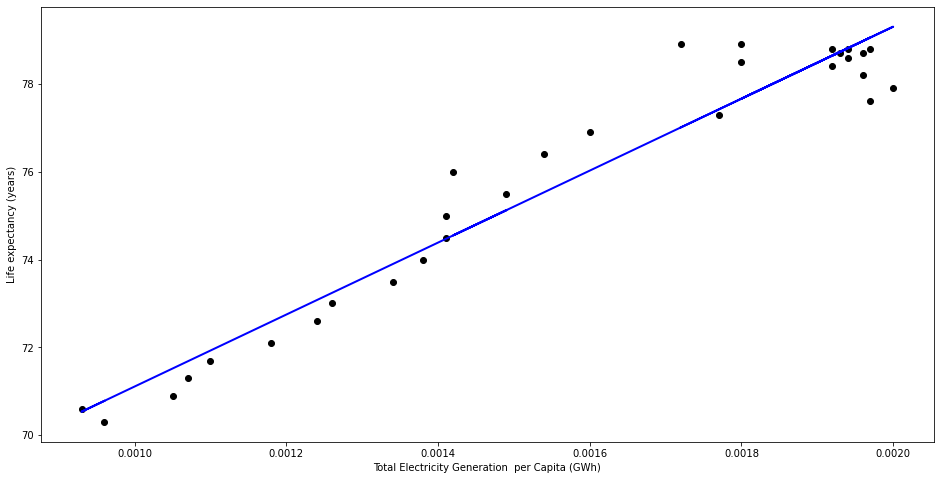

In [22]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['Total Electricity Generation  per Capita (GWh)'],
    data['Life expectancy (years)'],
    c='black'
)
plt.plot(
    data['Total Electricity Generation  per Capita (GWh)'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Total Electricity Generation  per Capita (GWh)")
plt.ylabel("Life expectancy (years)")
plt.show()

In [16]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                              
Dep. Variable:     Life expectancy (years)   R-squared:                       0.938
Model:                                 OLS   Adj. R-squared:                  0.936
Method:                      Least Squares   F-statistic:                     422.4
Date:                     Tue, 04 Jan 2022   Prob (F-statistic):           1.99e-18
Time:                             10:53:01   Log-Likelihood:                -33.476
No. Observations:                       30   AIC:                             70.95
Df Residuals:                           28   BIC:                             73.75
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [18]:
print(est2.pvalues)

const                                             4.182335e-37
Total Electricity Generation  per Capita (GWh)    1.985007e-18
dtype: float64
